# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) RM351578 - RODRIGO DE DEO VIEIRA

### Enunciado
O departamento de crédito da QuantumFinance solicitou a criação de um algoritmo para predizer o valor dos imóveis em determinada região a fim de mensurarem a provisão de crédito para o próximo ano. Assim, baseado no dataset disponível, use Regressão Linear Multivariada para predizer o valor dos imóveis com um RMSE abaixo de 69000. [dataset](https://github.com/ageron/handson-ml2/tree/master/datasets/housing)

Links úteis:

[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

[Train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [1]:
# leitura dos dados
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as me
import matplotlib.pyplot as plt

housing = pd.read_csv('bases/housing.csv')
housing.dropna()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
###############################
#Limpando os nulos
############################### 
print(housing['total_bedrooms'].isnull().sum()) 
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)
print(housing['total_bedrooms'].isnull().sum()) 
print('-'*40) 
print(housing['median_house_value'].isnull().sum()) 
housing['median_house_value'].fillna(housing['median_house_value'].median(), inplace=True)
print(housing['median_house_value'].isnull().sum()) 
print('-'*40) 
print(housing['population'].isnull().sum()) 
housing['population'].fillna(housing['population'].median(), inplace=True)


207
0
----------------------------------------
0
0
----------------------------------------
0


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
###############################
# Classificando idades medias por faixa
###############################
#housing['housing_median_age_band'] = pd.cut(housing['housing_median_age'], 5)
#housing[['housing_median_age_band', 'median_house_value']].groupby(['housing_median_age_band'], as_index=False).mean().sort_values(by='housing_median_age_band', ascending=True)


In [5]:
###############################
# Classificando a media de idade por faixa na tabela
###############################
def condicao_idade(valor):
    if valor <= 11.2:
        return "CRIANCA"
    elif (valor > 11.2) & (valor <= 21.4):  
        return "ADOLESCENTE"
    elif (valor > 21.4) & (valor <= 31.6): 
        return "ADULTO"
    elif (valor > 31.6) & (valor <= 41.8): 
        return "MEIAIDADE"
    else:
        return "VELHO"
    
housing['AGE_TITTLE'] = housing['housing_median_age'].apply(condicao_idade)    


housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,AGE_TITTLE
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,MEIAIDADE
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,ADOLESCENTE
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,VELHO
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,VELHO
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,VELHO
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,ADULTO
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,ADOLESCENTE
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,ADOLESCENTE
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,ADOLESCENTE


In [6]:
###############################
# Classificando latitude por faixa
###############################
#housing['latitude_band'] = pd.cut(housing['latitude'], 5)
#housing[['latitude_band', 'median_house_value']].groupby(['latitude_band'], as_index=False).mean().sort_values(by='latitude_band', ascending=True)


In [7]:
###############################
# Classificando a latitude e Longitude por faixa na tabela
###############################

def condicao_latitude(valor):
    if valor <= 34.422:
        return "L1"
    elif (valor > 34.422) & (valor <= 36.304):  
        return "L2"
    elif (valor > 36.304) & (valor <= 38.186): 
        return "L3"
    elif (valor > 38.186) & (valor <= 40.068): 
        return "L4"
    else:
        return "L5"
    
housing['LAT_REGION'] = housing['latitude'].apply(condicao_latitude)    


def condicao_longitude(valor):
    if valor <= -122.342:
        return "LO1"
    elif (valor >  -122.342) & (valor <= -120.334):  
        return "LO2"
    elif (valor > -120.334) & (valor <= -118.326): 
        return "LO3"
    elif (valor > -118.326) & (valor <= -116.318): 
        return "LO4"
    else:
        return "LO5"
    
housing['LON_REGION'] = housing['longitude'].apply(condicao_longitude)    



In [8]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,AGE_TITTLE,LAT_REGION,LON_REGION
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,MEIAIDADE,L3,LO2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,ADOLESCENTE,L3,LO2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,VELHO,L3,LO2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,VELHO,L3,LO2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,VELHO,L3,LO2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,ADULTO,L4,LO2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,ADOLESCENTE,L4,LO2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,ADOLESCENTE,L4,LO2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,ADOLESCENTE,L4,LO2


In [9]:
##############################
# Classificando a familias por faixa na tabela
###############################

def condicao_familia(valor):
    if valor <= 1217.2:
        return "POUCADENSIDADE"
    elif (valor >  1217.2) & (valor <= 2433.4):  
        return "MEDIADENSIDADE"
    elif (valor > 2433.4) & (valor <= 3649.6): 
        return "DENSO"
    elif (valor > 3649.6) & (valor <= 4865.8): 
        return "MUITODENSO"
    else:
        return "POPULOSO"
    
housing['FAMILIAS'] = housing['households'].apply(condicao_familia)    

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,AGE_TITTLE,LAT_REGION,LON_REGION,FAMILIAS
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,MEIAIDADE,L3,LO2,POUCADENSIDADE
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,ADOLESCENTE,L3,LO2,POUCADENSIDADE
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,ADULTO,L4,LO2,POUCADENSIDADE
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE


In [10]:
###############################
# Classificando a media salarial por faixa na tabela
###############################
def media_salario(valor):
    if valor <= 3:
        return "E"
    elif (valor >  3) & (valor <= 6):  
        return "D"
    elif (valor > 6) & (valor <= 9): 
        return "C"
    elif (valor > 9) & (valor <= 12): 
        return "B"
    else:
        return "A"
    
housing['SALARIO'] = housing['median_income'].apply(media_salario)    

housing
 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,AGE_TITTLE,LAT_REGION,LON_REGION,FAMILIAS,SALARIO
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,MEIAIDADE,L3,LO2,POUCADENSIDADE,C
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,ADOLESCENTE,L3,LO2,POUCADENSIDADE,C
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,C
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,D
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,ADULTO,L4,LO2,POUCADENSIDADE,E
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E


In [11]:
###############################
# Classificando a media populacao por faixa na tabela
###############################
def media_populacao(valor):
    if valor <= 7138.8:
        return "MUITOBAIXA"
    elif (valor >  7138.8) & (valor <= 14274.6):  
        return "POUCA"
    elif (valor > 14274.6) & (valor <= 21410.4): 
        return "MEDIA"
    elif (valor > 21410.4) & (valor <= 28546.2): 
        return "ALTA"
    else:
        return "MUITOALTA"
    
housing['POPULACAO'] = housing['population'].apply(media_populacao)    

housing
 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,AGE_TITTLE,LAT_REGION,LON_REGION,FAMILIAS,SALARIO,POPULACAO
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,MEIAIDADE,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,ADOLESCENTE,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,D,MUITOBAIXA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,D,MUITOBAIXA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,ADULTO,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA


In [12]:
###############################
# Classificando a quartps por faixa na tabela
###############################
def media_quartos(valor):
    if valor <= 0.8:
        return "MUITOBAIXA"
    elif (valor >  0.8) & (valor <= 1.6):  
        return "POUCA"
    elif (valor > 1.6) & (valor <= 2.4): 
        return "MEDIA"
    elif (valor > 2.4) & (valor <= 3.2): 
        return "ALTA"
    else:
        return "MUITOALTA"
    
housing['QUARTOS'] = housing['total_rooms'].apply(media_quartos)    

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,AGE_TITTLE,LAT_REGION,LON_REGION,FAMILIAS,SALARIO,POPULACAO,QUARTOS
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,MEIAIDADE,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA,MUITOALTA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,ADOLESCENTE,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA,MUITOALTA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA,MUITOALTA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,D,MUITOBAIXA,MUITOALTA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,D,MUITOBAIXA,MUITOALTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,ADULTO,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA


In [13]:
###############################
# Classificando a banheiros por faixa na tabela
###############################
def media_banheiros(valor):
    if valor <= 1289.8:
        return "MUITOBAIXA"
    elif (valor >  1289.8) & (valor <= 2578.6):  
        return "POUCA"
    elif (valor > 2578.6) & (valor <= 3867.4): 
        return "MEDIA"
    elif (valor > 3867.4) & (valor <= 5156.2): 
        return "ALTA"
    else:
        return "MUITOALTA"
    
housing['BANHEIROS'] = housing['total_bedrooms'].apply(media_banheiros)    

housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,AGE_TITTLE,LAT_REGION,LON_REGION,FAMILIAS,SALARIO,POPULACAO,QUARTOS,BANHEIROS
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,MEIAIDADE,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA,MUITOALTA,MUITOBAIXA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,ADOLESCENTE,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA,MUITOALTA,MUITOBAIXA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA,MUITOALTA,MUITOBAIXA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,D,MUITOBAIXA,MUITOALTA,MUITOBAIXA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,D,MUITOBAIXA,MUITOALTA,MUITOBAIXA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,ADULTO,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA,MUITOBAIXA
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA,MUITOBAIXA
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA,MUITOBAIXA
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA,MUITOBAIXA


In [14]:
###############################
# Criando meu X e Y
###############################
X = housing.iloc[:,:]
X = X.drop(["median_house_value"],axis=1) 
Y = pd.DataFrame(housing.iloc[:,8])

In [15]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,AGE_TITTLE,LAT_REGION,LON_REGION,FAMILIAS,SALARIO,POPULACAO,QUARTOS,BANHEIROS
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,MEIAIDADE,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA,MUITOALTA,MUITOBAIXA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,ADOLESCENTE,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA,MUITOALTA,MUITOBAIXA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,C,MUITOBAIXA,MUITOALTA,MUITOBAIXA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,D,MUITOBAIXA,MUITOALTA,MUITOBAIXA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,VELHO,L3,LO2,POUCADENSIDADE,D,MUITOBAIXA,MUITOALTA,MUITOBAIXA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,ADULTO,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA,MUITOBAIXA
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA,MUITOBAIXA
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA,MUITOBAIXA
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,ADOLESCENTE,L4,LO2,POUCADENSIDADE,E,MUITOBAIXA,MUITOALTA,MUITOBAIXA


In [16]:
Y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [17]:
###############################
# Variaveis Dummy
###############################
X = pd.get_dummies(X)

#X_dummies


In [18]:
###############################
# Separar dados em Treino e Teste
###############################
#,test_size = 1/3
X_train, X_test, Y_train, Y_test = ms.train_test_split(X,Y,test_size = 1/5,random_state = 0)


In [19]:
Y_train

,median_house_value
12069,500001.0
15925,270000.0
11162,196100.0
4904,118800.0
4683,225000.0
...,...
13123,144600.0
19648,159400.0
9845,289300.0
10799,484600.0


In [20]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,...,POPULACAO_MUITOALTA,POPULACAO_MUITOBAIXA,POPULACAO_POUCA,QUARTOS_MEDIA,QUARTOS_MUITOALTA,BANHEIROS_ALTA,BANHEIROS_MEDIA,BANHEIROS_MUITOALTA,BANHEIROS_MUITOBAIXA,BANHEIROS_POUCA
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,False,True,...,False,True,False,False,True,False,False,False,True,False
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,False,False,...,False,True,False,False,True,False,False,False,True,False
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,True,False,...,False,True,False,False,True,False,False,False,True,False
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,True,False,...,False,True,False,False,True,False,False,False,True,False
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,True,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,False,True,...,False,True,False,False,True,False,False,False,True,False
19648,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,False,True,...,False,True,False,False,True,False,False,False,True,False
9845,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,False,False,...,False,True,False,False,True,False,False,False,True,False
10799,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,True,False,...,False,True,False,False,True,False,False,False,True,False


In [21]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,...,POPULACAO_MUITOALTA,POPULACAO_MUITOBAIXA,POPULACAO_POUCA,QUARTOS_MEDIA,QUARTOS_MUITOALTA,BANHEIROS_ALTA,BANHEIROS_MEDIA,BANHEIROS_MUITOALTA,BANHEIROS_MUITOBAIXA,BANHEIROS_POUCA
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,False,False,...,False,True,False,False,True,False,False,False,True,False
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,True,False,...,False,True,False,False,True,False,False,False,True,False
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,False,True,...,False,True,False,False,True,False,False,False,True,False
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,False,True,...,False,True,False,False,True,False,False,False,True,False
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,False,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,-118.13,34.16,33.0,2682.0,716.0,2050.0,692.0,2.4817,True,False,...,False,True,False,False,True,False,False,False,True,False
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,True,False,...,False,True,False,False,True,False,False,False,True,False
1919,-120.92,38.86,11.0,1720.0,345.0,850.0,326.0,3.2027,False,True,...,False,True,False,False,True,False,False,False,True,False
1450,-121.95,37.96,18.0,2739.0,393.0,1072.0,374.0,6.1436,False,True,...,False,True,False,False,True,False,False,False,True,False


In [22]:
Y_train

,median_house_value
12069,500001.0
15925,270000.0
11162,196100.0
4904,118800.0
4683,225000.0
...,...
13123,144600.0
19648,159400.0
9845,289300.0
10799,484600.0


In [23]:
###############################
#Limpando os nulos
############################### 
print(X_train.isnull().sum()) 
print('-'*40) 
print(Y_train.isnull().sum())
print('-'*40) 
print(X_test.isnull().sum())

X_train['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace=True)
X_test['total_bedrooms'].fillna(X_test['total_bedrooms'].median(), inplace=True)

print('-'*40) 
print(X_train.isnull().sum()) 
print('-'*40) 
print(X_test.isnull().sum())


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
AGE_TITTLE_ADOLESCENTE        0
AGE_TITTLE_ADULTO             0
AGE_TITTLE_CRIANCA            0
AGE_TITTLE_MEIAIDADE          0
AGE_TITTLE_VELHO              0
LAT_REGION_L1                 0
LAT_REGION_L2                 0
LAT_REGION_L3                 0
LAT_REGION_L4                 0
LAT_REGION_L5                 0
LON_REGION_LO1                0
LON_REGION_LO2                0
LON_REGION_LO3                0
LON_REGION_LO4                0
LON_REGION_LO5                0
FAMILIAS_DENSO                0
FAMILIAS_MEDIADENSIDADE       0
FAMILIAS_MUITODENSO           0
FAMILIAS

In [24]:
###############################
# Treinando o modelo
###############################

regressor = lm.LinearRegression()
regressor.fit(X_train,Y_train)


LinearRegression()

In [25]:
###############################
# Previsao
###############################
np.set_printoptions(precision=2)

Y_pred = pd.DataFrame(regressor.predict(X_test))

Y_pred = Y_pred.rename(columns={0: 'Y_pred'})

Y_test = pd.DataFrame(Y_test)

Y_test = Y_test.rename(columns={'median_house_value': 'Y_test'})

Y_test = Y_test.reset_index(drop=True)

result = pd.concat([Y_pred.round(2),Y_test],axis=1)

result


,Y_pred,Y_test
0,196292.04,136900.0
1,266088.38,241300.0
2,173154.06,200700.0
3,95201.42,72500.0
4,308540.22,460000.0
...,...,...
4123,163243.97,169500.0
4124,265562.16,204600.0
4125,101022.02,128600.0
4126,285964.96,259500.0


In [26]:
###############################
# Comparando os resultados
###############################
Y_compare = result

Y_compare = Y_compare.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)

resultado_final = pd.concat([Y_compare, X_test],axis=1)

resultado_final



,Y_pred,Y_test,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,...,POPULACAO_MUITOALTA,POPULACAO_MUITOBAIXA,POPULACAO_POUCA,QUARTOS_MEDIA,QUARTOS_MUITOALTA,BANHEIROS_ALTA,BANHEIROS_MEDIA,BANHEIROS_MUITOALTA,BANHEIROS_MUITOBAIXA,BANHEIROS_POUCA
0,196292.04,136900.0,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,...,False,True,False,False,True,False,False,False,True,False
1,266088.38,241300.0,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,...,False,True,False,False,True,False,False,False,True,False
2,173154.06,200700.0,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,...,False,True,False,False,True,False,False,False,True,False
3,95201.42,72500.0,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,...,False,True,False,False,True,False,False,False,True,False
4,308540.22,460000.0,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,163243.97,169500.0,-118.13,34.16,33.0,2682.0,716.0,2050.0,692.0,2.4817,...,False,True,False,False,True,False,False,False,True,False
4124,265562.16,204600.0,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,...,False,True,False,False,True,False,False,False,True,False
4125,101022.02,128600.0,-120.92,38.86,11.0,1720.0,345.0,850.0,326.0,3.2027,...,False,True,False,False,True,False,False,False,True,False
4126,285964.96,259500.0,-121.95,37.96,18.0,2739.0,393.0,1072.0,374.0,6.1436,...,False,True,False,False,True,False,False,False,True,False


In [27]:
###############################
# Calculando o RMSE da Predicao
###############################
import math

# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error (RMSE): %d" % math.sqrt(me.mean_squared_error(Y_test, Y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % me.r2_score(Y_test, Y_pred))
acc_log = round(regressor.score(X_train, Y_train) * 100, 2)
print("Score:",acc_log)

Coefficients: 
 [[-1.94e+04 -1.05e+04  2.15e+03 -4.50e+00  8.65e+01 -4.48e+01  8.45e+01
   3.74e+04 -2.43e+04 -5.66e+04  1.24e+05 -3.16e+04 -1.14e+04  1.10e+04
   9.20e+02  2.75e+04 -1.64e+04 -2.30e+04  7.14e+04  1.10e+04  4.01e+03
  -1.85e+04 -6.80e+04  3.99e+04  9.50e+03  4.74e+03 -2.94e+04 -2.47e+04
   3.58e+04  4.76e+04  7.09e+04 -2.00e+05  4.52e+04 -1.06e+05  3.36e+04
   4.40e+04  1.32e+04  1.52e+04  3.62e+04  6.28e+05 -3.72e+05 -2.92e+05
   6.18e+04 -6.18e+04 -8.23e+04  3.16e+04 -2.00e+05  1.40e+05  1.11e+05]]
Mean squared error (RMSE): 65342
Coefficient of determination: 0.67
Score: 68.43


In [28]:
X_test.info()
print('-----------')
Y_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   4128 non-null   float64
 1   latitude                    4128 non-null   float64
 2   housing_median_age          4128 non-null   float64
 3   total_rooms                 4128 non-null   float64
 4   total_bedrooms              4128 non-null   float64
 5   population                  4128 non-null   float64
 6   households                  4128 non-null   float64
 7   median_income               4128 non-null   float64
 8   ocean_proximity_<1H OCEAN   4128 non-null   bool   
 9   ocean_proximity_INLAND      4128 non-null   bool   
 10  ocean_proximity_ISLAND      4128 non-null   bool   
 11  ocean_proximity_NEAR BAY    4128 non-null   bool   
 12  ocean_proximity_NEAR OCEAN  4128 non-null   bool   
 13  AGE_TITTLE_ADOLESCENTE      4128 

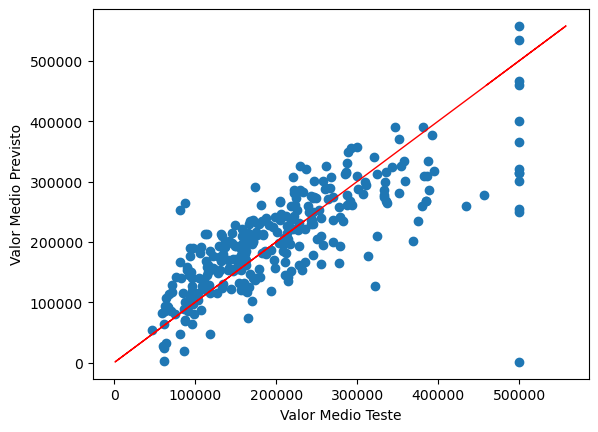

In [29]:
###############################
# Plotando Graficos
#Vou usar um pedaço randomico do resultado para conseguir visualizar melhor
###############################

num_linhas = 300
s_resultado = resultado_final.sample(n=num_linhas)

# Plot outputs
plt.scatter(s_resultado['Y_test'],s_resultado['Y_pred'])
plt.plot(s_resultado['Y_pred'], s_resultado['Y_pred'], color="red", linewidth=1)

#plt.xticks((s_resultado['Y_test']))
#plt.yticks((s_resultado['Y_pred']))

plt.xlabel('Valor Medio Teste')
plt.ylabel('Valor Medio Previsto')
plt.show()

In [30]:
s_resultado

,Y_pred,Y_test,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,...,POPULACAO_MUITOALTA,POPULACAO_MUITOBAIXA,POPULACAO_POUCA,QUARTOS_MEDIA,QUARTOS_MUITOALTA,BANHEIROS_ALTA,BANHEIROS_MEDIA,BANHEIROS_MUITOALTA,BANHEIROS_MUITOBAIXA,BANHEIROS_POUCA
3596,235229.02,167500.0,-117.05,33.13,22.0,2427.0,390.0,1099.0,362.0,5.2323,...,False,True,False,False,True,False,False,False,True,False
1702,197580.08,203500.0,-117.95,33.85,13.0,6963.0,1426.0,3892.0,1375.0,4.1325,...,False,True,False,False,True,False,False,False,False,True
3318,320944.03,500001.0,-118.35,34.07,52.0,2497.0,406.0,1030.0,412.0,4.8900,...,False,True,False,False,True,False,False,False,True,False
3566,228838.21,243200.0,-121.17,38.69,5.0,7138.0,1227.0,2623.0,1139.0,5.6902,...,False,True,False,False,True,False,False,False,True,False
3787,27854.20,59800.0,-119.29,35.76,15.0,3938.0,789.0,3500.0,768.0,2.1295,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,315887.83,336100.0,-122.48,37.76,52.0,3260.0,653.0,1594.0,632.0,4.4094,...,False,True,False,False,True,False,False,False,True,False
2776,192663.11,149300.0,-119.17,34.20,36.0,2028.0,523.0,2751.0,496.0,3.0150,...,False,True,False,False,True,False,False,False,True,False
2319,189760.31,93800.0,-118.48,34.22,22.0,3430.0,1214.0,3618.0,1092.0,2.1974,...,False,True,False,False,True,False,False,False,True,False
1378,141513.90,76400.0,-122.37,37.95,32.0,1298.0,363.0,716.0,268.0,0.9797,...,False,True,False,False,True,False,False,False,True,False


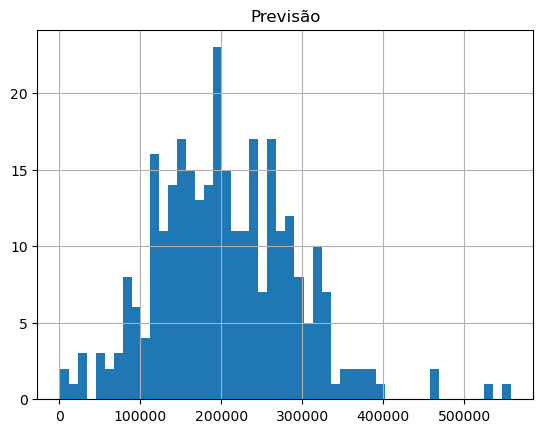

In [35]:
s_resultado['Y_pred'].hist(bins=50)
plt.title('Previsão')
plt.show()

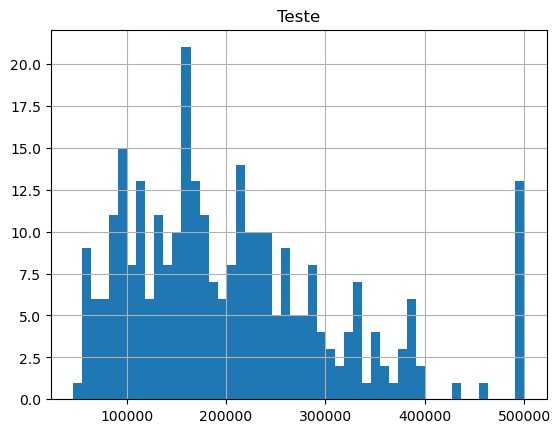

In [37]:
s_resultado['Y_test'].hist(bins=50)
plt.title('Teste')
plt.show()